In [1]:
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal
import seaborn as sns

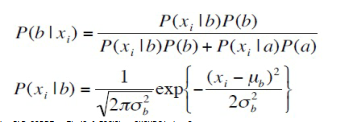
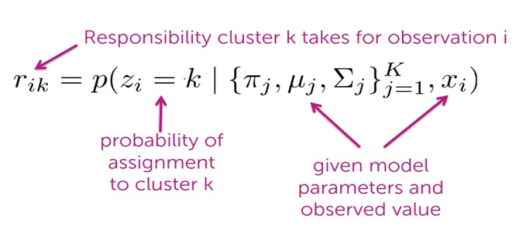
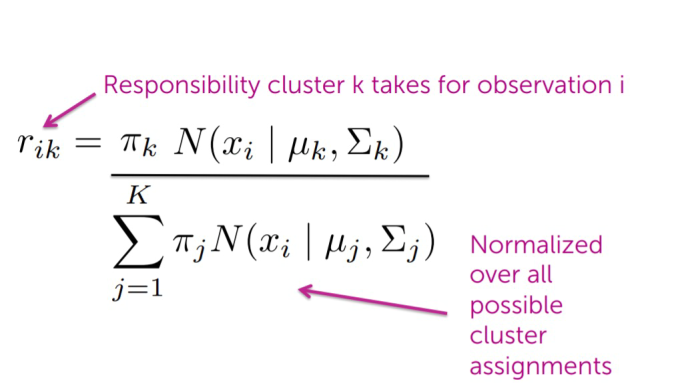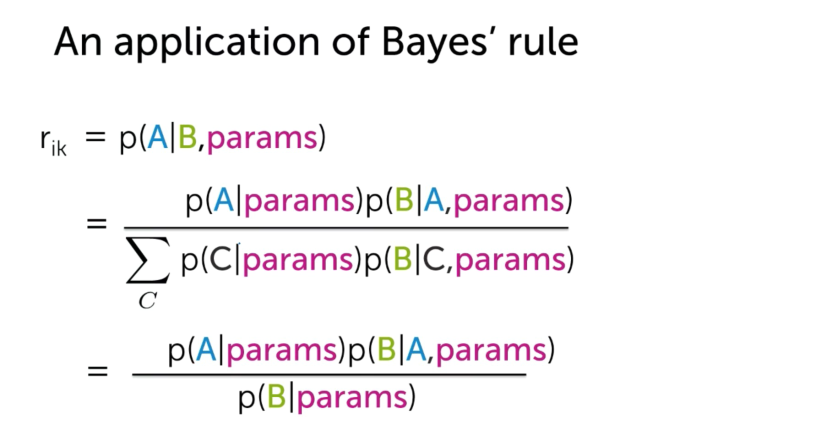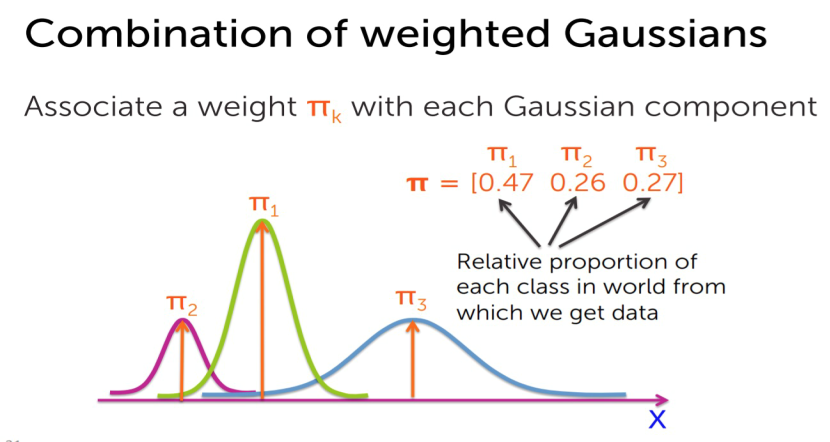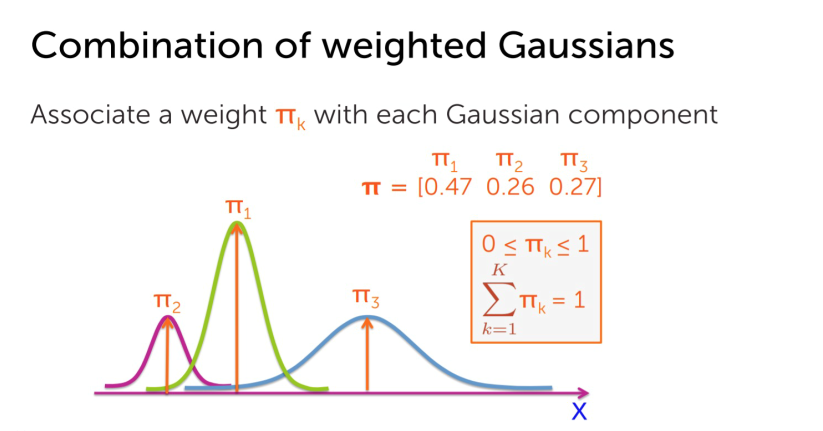

aweightsarray_like, optional
1-D array of observation vector weights. These relative weights are typically large for observations considered “important” and smaller for observations considered less “important”. If ddof=0 the array of weights can be used to assign probabilities to observation vectors.

New in version 1.10.

biasbool, optional
Default normalization (False) is by (N - 1), where N is the number of observations given (unbiased estimate). If bias is True, then normalization is by N. These values can be overridden by using the keyword ddof in numpy versions >= 1.5.

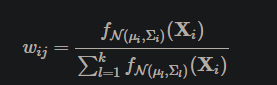
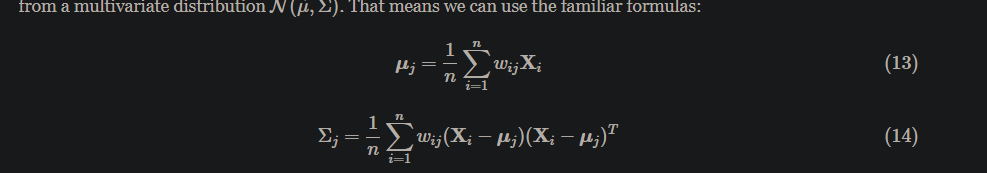

In [2]:
def EM(data,probabilities,n_clusters,phi_v,mu_v,sigma_v):
    # E-Step: update probabilities and phi_v holding mu and sigma constant
    n, m = data.shape
    likelihood_m = np.zeros( (m, n_clusters) )
    for i in range(n_clusters):
        #The Vector
        likelihood_m[:,i] = stats.multivariate_normal(mean=mu_v[i],cov=sigma_v[i]).pdf(data)
    numerator = likelihood_m * phi_v
    denominator = numerator.sum(axis=1)[:, np.newaxis]
    probabilities = numerator / denominator
    
    phi_v = probabilities.mean(axis=0)
    # M-Step: update mu_v and sigma_v holding phi and probabilities constant
    for i in range(n_clusters):
        weight = probabilities[:, [i]]
        mu_v[i] = (data * weight).sum(axis=0) / weight.sum()
        aweights=(weight/weight.sum()).flatten()
        sigma_v[i] = np.cov(data.T,aweights=aweights, bias=True)
    return probabilities,phi_v,mu_v,sigma_v

In [3]:
def mohey_GMM(data,n_clusters,maxiter=5):
    #intialize them all 
    m,n = data.shape
    probabilities = np.random.rand(n, m)
    #mu vector of row vectors 
    #n_clusters X (m,)
    #https://www.kite.com/python/answers/how-to-select-random-rows-from-a-numpy-array-in-python
    random_indices = np.random.choice(n, size=n_clusters, replace=True)
    mu_v = [  X[random_indices,:] for i in random_indices ]
    #sigma (i ccoudnnt finde better answer)
    #https://towardsdatascience.com/gaussian-mixture-models-implemented-from-scratch-1857e40ea566?utm_source=pocket_mylist
    #sigma vector of matricies 
    #n_clusters X (m,m)
    sigma_v = [ np.cov(X.T) for i in range(n_clusters) ]
    #phi vector of the columns size (m,)
    phi_v = probabilities.mean(axis=0)

    for i in range(maxiter):
        #EM steps
        probabilities,phi_v,mu_v,sigma_v = EM(data,probabilities,n_clusters,phi_v,mu_v,sigma_v)
    return np.argmax(probabilities, axis=1)

In [4]:
def MoheyGMM(data, n_clusters, max_iterations=5):
    #intialize them all 
    shape = data.shape
    #data (N X M)
    n, m = shape
    #https://www.kite.com/python/answers/how-to-select-random-rows-from-a-numpy-array-in-python
    random_row = np.random.randint(low=0, high=n, size=n_clusters)
    mu = [data[row_index,:] for row_index in random_row ]
    #sigma (i ccoudnnt finde better answer)
    #https://towardsdatascience.com/gaussian-mixture-models-implemented-from-scratch-1857e40ea566?utm_source=pocket_mylist
    #sigma vector of matricies 
    #n_clusters X (m,m)
    sigma = [np.cov(data.T) for _ in range(n_clusters)]
    #phi vector of the columns size (m,)
    phi = np.random.rand(n_clusters)

    for iteration in range(max_iterations):
        #EEEEE Step
        likelihood = np.zeros((n, n_clusters))
        for i in range(n_clusters):
            #needed the internet help for these
            distribution = multivariate_normal(mean=mu[i], cov=sigma[i])
            likelihood[:,i] = distribution.pdf(data)
    
    numerator = likelihood * phi
    denominator = numerator.sum(axis=1)[:, np.newaxis]
    probabilities = numerator / denominator
    phi = probabilities.mean(axis=0)
    # MMMM Step
    for i in range(n_clusters):
        weight = probabilities[:, [i]]
        total_weight = weight.sum()
        mu[i] = (data * weight).sum(axis=0) / total_weight
        sigma[i] = np.cov(data.T, aweights=(weight / total_weight).flatten(), bias = True)
    
    #readjust the weights
    likelihood = np.zeros((n, n_clusters))
    for i in range(n_clusters):
        distribution = multivariate_normal(mean=mu[i], cov=sigma[i])
        likelihood[:,i] = distribution.pdf(data)

    numerator = likelihood * phi
    denominator = numerator.sum(axis=1)[:, np.newaxis]
    probabilities = numerator / denominator
    return np.argmax(probabilities, axis=1) 

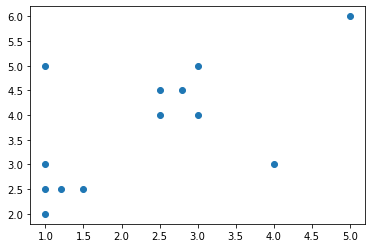

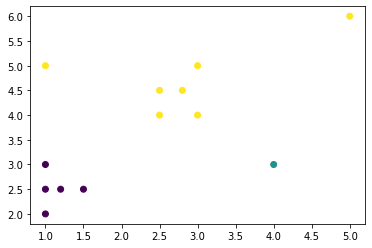

In [5]:
np.random.seed(4)
data = [[1, 2], [3, 4], [2.5, 4], [1.5, 2.5], [3, 5],
        [2.8, 4.5], [2.5, 4.5], [1.2, 2.5], [1, 3],
        [1, 5], [1, 2.5], [5, 6], [4, 3]]

np_data = np.array(
        [1, 2, 3, 4, 2.5, 4, 1.5, 2.5, 3, 5,
        2.8, 4.5, 2.5, 4.5, 1.2, 2.5, 1, 3,
        1, 5, 1, 2.5, 5, 6, 4, 3
]).reshape(13, 2)
import matplotlib.pyplot as plt
plt.scatter(np_data[:,0], np_data[:, 1])
plt.show()
labels = MoheyGMM(np_data,3)
plt.scatter(np_data[:,0], np_data[:, 1], c=labels)
plt.show()

sorry for the messey code is wasnt easy to vectorize the methods used and i hade to refactor alot of time and copy some needed fucntion from the internet to make the code more clean 
[source used](http://www.oranlooney.com/post/ml-from-scratch-part-5-gmm/)